In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import cv2

In [71]:
for i in range(60, 180+1, 40):
    print(i)

60
100
140
180


In [72]:
def plot_tactile_sensor(ax, sensor_values, use_img=False, img=None, title='Tip Position'):
    # sensor_values: (16, 3) - 3 values for each tactile - x and y represents the position, z represents the pressure on the tactile point
    img_shape = (240, 240, 3) # For one sensor
    blank_image = np.ones(img_shape, np.uint8) * 255
    if use_img == False: 
        img = ax.imshow(blank_image.copy())
    ax.set_title(title)

    # Set the coordinates for each circle
    tactile_coordinates = []
    for j in range(60, 180+1, 40): # Y
        for i in range(60, 180+1, 40): # X - It goes from top left to bottom right row first 
            tactile_coordinates.append([i,j])

    # Plot the circles 
    for i in range(sensor_values.shape[0]):
        center_coordinates = (
            tactile_coordinates[i][0] + int(sensor_values[i,0]/20), # NOTE: Change this
            tactile_coordinates[i][1] + int(sensor_values[i,1]/20)
        )
        radius = max(10 + int(sensor_values[i,2]/10), 2)
      
        if i == 0:
            frame_axis = cv2.circle(blank_image.copy(), center_coordinates, radius, color=(0,255,0), thickness=-1)
        else:
            frame_axis = cv2.circle(frame_axis.copy(), center_coordinates, radius, color=(0,255,0), thickness=-1)

    img.set_array(frame_axis)

    return img, frame_axis

In [76]:
def plot_tactile_curved_tip(ax, sensor_values, use_img=False, img=None, title='Tip Position'):
    # sensor_values: (16, 3) - 3 values for each tactile - x and y represents the position, z represents the pressure on the tactile point
    img_shape = (240, 240, 3) # For one sensor
    blank_image = np.ones(img_shape, np.uint8) * 255
    if use_img == False: 
        img = ax.imshow(blank_image.copy())
    ax.set_title(title)

    # Set the coordinates for each circle
    tactile_coordinates = []
    for j in range(20, 240, 40): # y axis
        # x axis is somewhat hard coded
        for i in range(20, 240, 40):
            if j == 20 and (i == 100 or i == 140): # Only the middle two will be added
                tactile_coordinates.append([i,j])
            elif (j > 20 and j < 100) and (i > 20 and i < 220):
                tactile_coordinates.append([i,j])
            elif j >= 100: 
                tactile_coordinates.append([i,j])
    
    # Plot the circles 
    for i in range(sensor_values.shape[0]):
        center_coordinates = (
            tactile_coordinates[i][0] + int(sensor_values[i,0]/20),
            tactile_coordinates[i][1] + int(sensor_values[i,1]/20)
        )
        radius = max(10 + int(sensor_values[i,2]/10), 2)
      
        if i == 0:
            frame_axis = cv2.circle(blank_image.copy(), center_coordinates, radius, color=(0,255,0), thickness=-1)
        else:
            frame_axis = cv2.circle(frame_axis.copy(), center_coordinates, radius, color=(0,255,0), thickness=-1)

    img.set_array(frame_axis)

    return img, frame_axis



In [77]:
# fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20,5))
# sensor_values = np.random.randn(30,3) * 20
# plot_tactile_curved_tip(axs[0], sensor_values=sensor_values)
# plot_tactile_curved_tip(axs[1], sensor_values=sensor_values)
# plot_tactile_curved_tip(axs[2], sensor_values=sensor_values)
# plot_tactile_curved_tip(axs[3], sensor_values=sensor_values)

In [78]:
def plot_tactile_palm(ax, sensor_values, use_img=False, img=None, title='Tip Position'):
    # sensor_values: (16, 3) - 3 values for each tactile - x and y represents the position, z represents the pressure on the tactile point
    img_shape = (480, 960, 3) # For one sensor
    blank_image = np.ones(img_shape, np.uint8) * 255
    if use_img == False: 
        img = ax.imshow(blank_image.copy())
    ax.set_title(title)

    # Set the coordinates for each circle
    tactile_coordinates = []
    for j in range(70, 410+1, 40):
        for i in range(180, 780+1, 40):
            if (j < 230) and ((i >= 220 and i <= 420) or (i >= 540 and i <= 740)):
                tactile_coordinates.append([i,j])
            elif (j > 230) and (i >= 540 and i <= 740):
                tactile_coordinates.append([i,j])

    print(len(tactile_coordinates))

    # Plot the circles 
    for i in range(sensor_values.shape[0]):
        center_coordinates = (
            tactile_coordinates[i][0] + int(sensor_values[i,0]/20),
            tactile_coordinates[i][1] + int(sensor_values[i,1]/20)
        )
        radius = max(10 + int(sensor_values[i,2]/10), 2)
      
        if i == 0:
            frame_axis = cv2.circle(blank_image.copy(), center_coordinates, radius, color=(0,255,0), thickness=-1)
        else:
            frame_axis = cv2.circle(frame_axis.copy(), center_coordinates, radius, color=(0,255,0), thickness=-1)

    img.set_array(frame_axis)

    return img, frame_axis

In [79]:
# fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
# sensor_values = np.random.randn(72,3) * 20
# plot_tactile_palm(axs, sensor_values=sensor_values)

k: thumb_empty
k: thumb_tip
k: thumb_section2
k: thumb_section3
k: index_tip
k: index_section1
k: index_section2
k: index_section3
k: mid_tip
k: mid_section1
k: mid_section2
k: mid_section3
k: ring_tip
k: ring_section1
k: ring_section2
k: ring_section3
k: palm
72


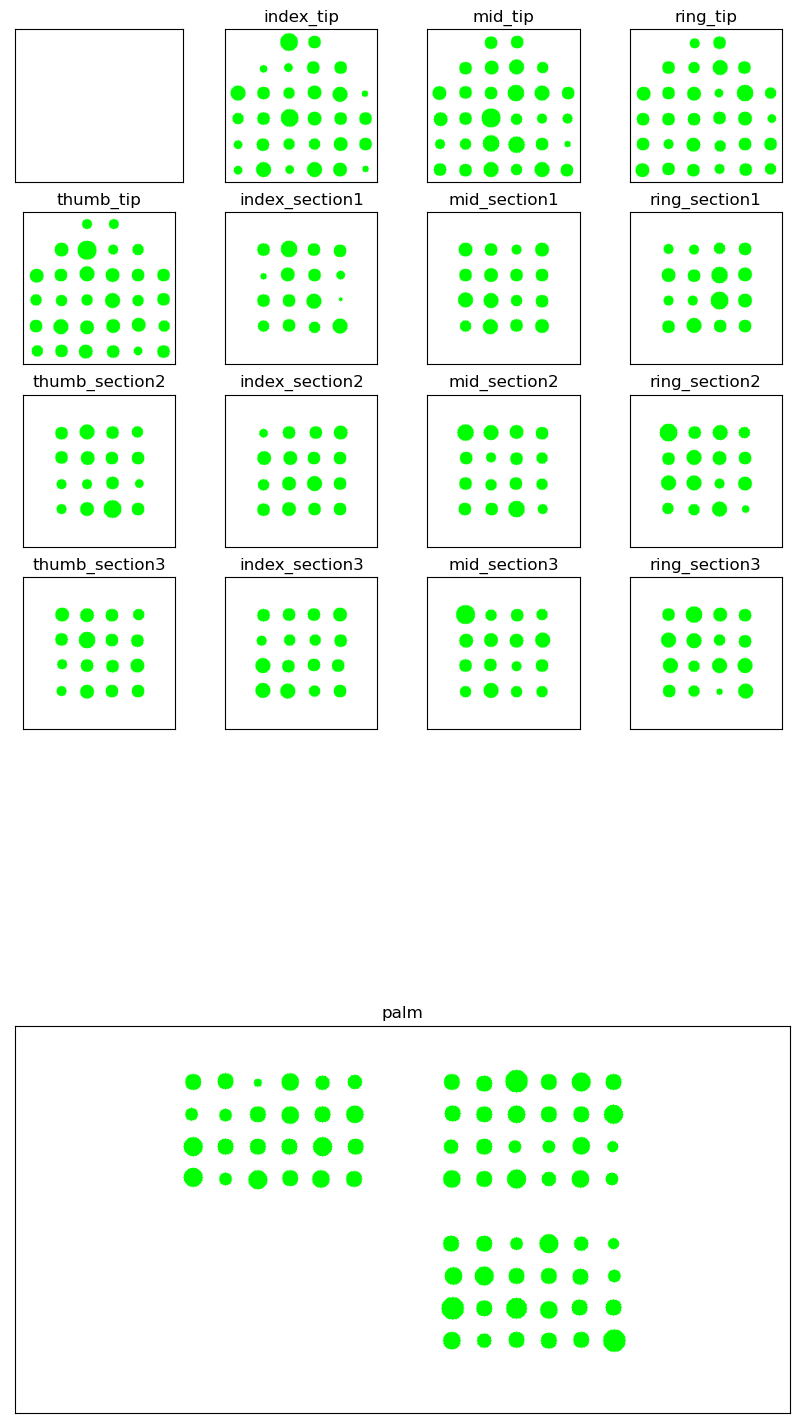

In [112]:
thumb = [['thumb_empty'],
          ['thumb_tip'],
          ['thumb_section2'],
          ['thumb_section3']]

index = [['index_tip'],
          ['index_section1'],
          ['index_section2'],
          ['index_section3']]

ring = [['ring_tip'],
          ['ring_section1'],
          ['ring_section2'],
          ['ring_section3']]

middle = [['mid_tip'],
          ['mid_section1'],
          ['mid_section2'],
          ['mid_section3']]

all_fingers = [thumb, index, middle, ring]

hand = [[thumb, index, middle, ring],
        ['palm', 'palm', 'palm', 'palm']]

# inner = [['innerA'],
#          ['innerB']]
# outer = [['upper left',  inner],
#           ['lower left', 'lower right']]
def annotate_axes(ax, text, fontsize=10):
    ax.text(0.5, 0.5, text, transform=ax.transAxes,
            ha="center", va="center", fontsize=fontsize, color="darkgrey")

fig, axs = plt.subplot_mosaic(hand, figsize=(10,20))
for k in axs:
    # annotate_axes(axs[k], f"{k}")
    print('k: {}'.format(k))

    if 'tip' in k:
        sensor_values = np.random.randn(30,3) * 20
        plot_tactile_curved_tip(axs[k], sensor_values=sensor_values, title=k)
    elif 'palm' in k:
        sensor_values = np.random.randn(72,3) * 20
        plot_tactile_palm(axs[k], sensor_values = sensor_values, title=k)
    elif not 'empty' in k:
        sensor_values = np.random.randn(16,3) * 20
        plot_tactile_sensor(axs[k], sensor_values=sensor_values, title=k)

    axs[k].get_yaxis().set_ticks([])
    axs[k].get_xaxis().set_ticks([])
